# Public vs. Housing Banishment

This notebook will focus on separating and creating two distinct shapefiles for:
- public banishment
- housing banishment

Each will also have a 500ft buffer and a 250ft buffer

In [23]:
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [18]:
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')
bike_routes_buffer = pd.read_pickle('./data/pickle/bike_routes_buffer')
daycare_buffer = pd.read_pickle('./data/pickle/daycare_buffer')
forestry_buffer = pd.read_pickle('./data/pickle/forestry_buffer')
parks_buffer = pd.read_pickle('./data/pickle/parks_buffer')
schools_buffer = pd.read_pickle('./data/pickle/schools_buffer')

## Housing Banishment

In [19]:
housing_banishment = [daycare_buffer, parks_buffer, schools_buffer]

### 500 ft buffer

In [20]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

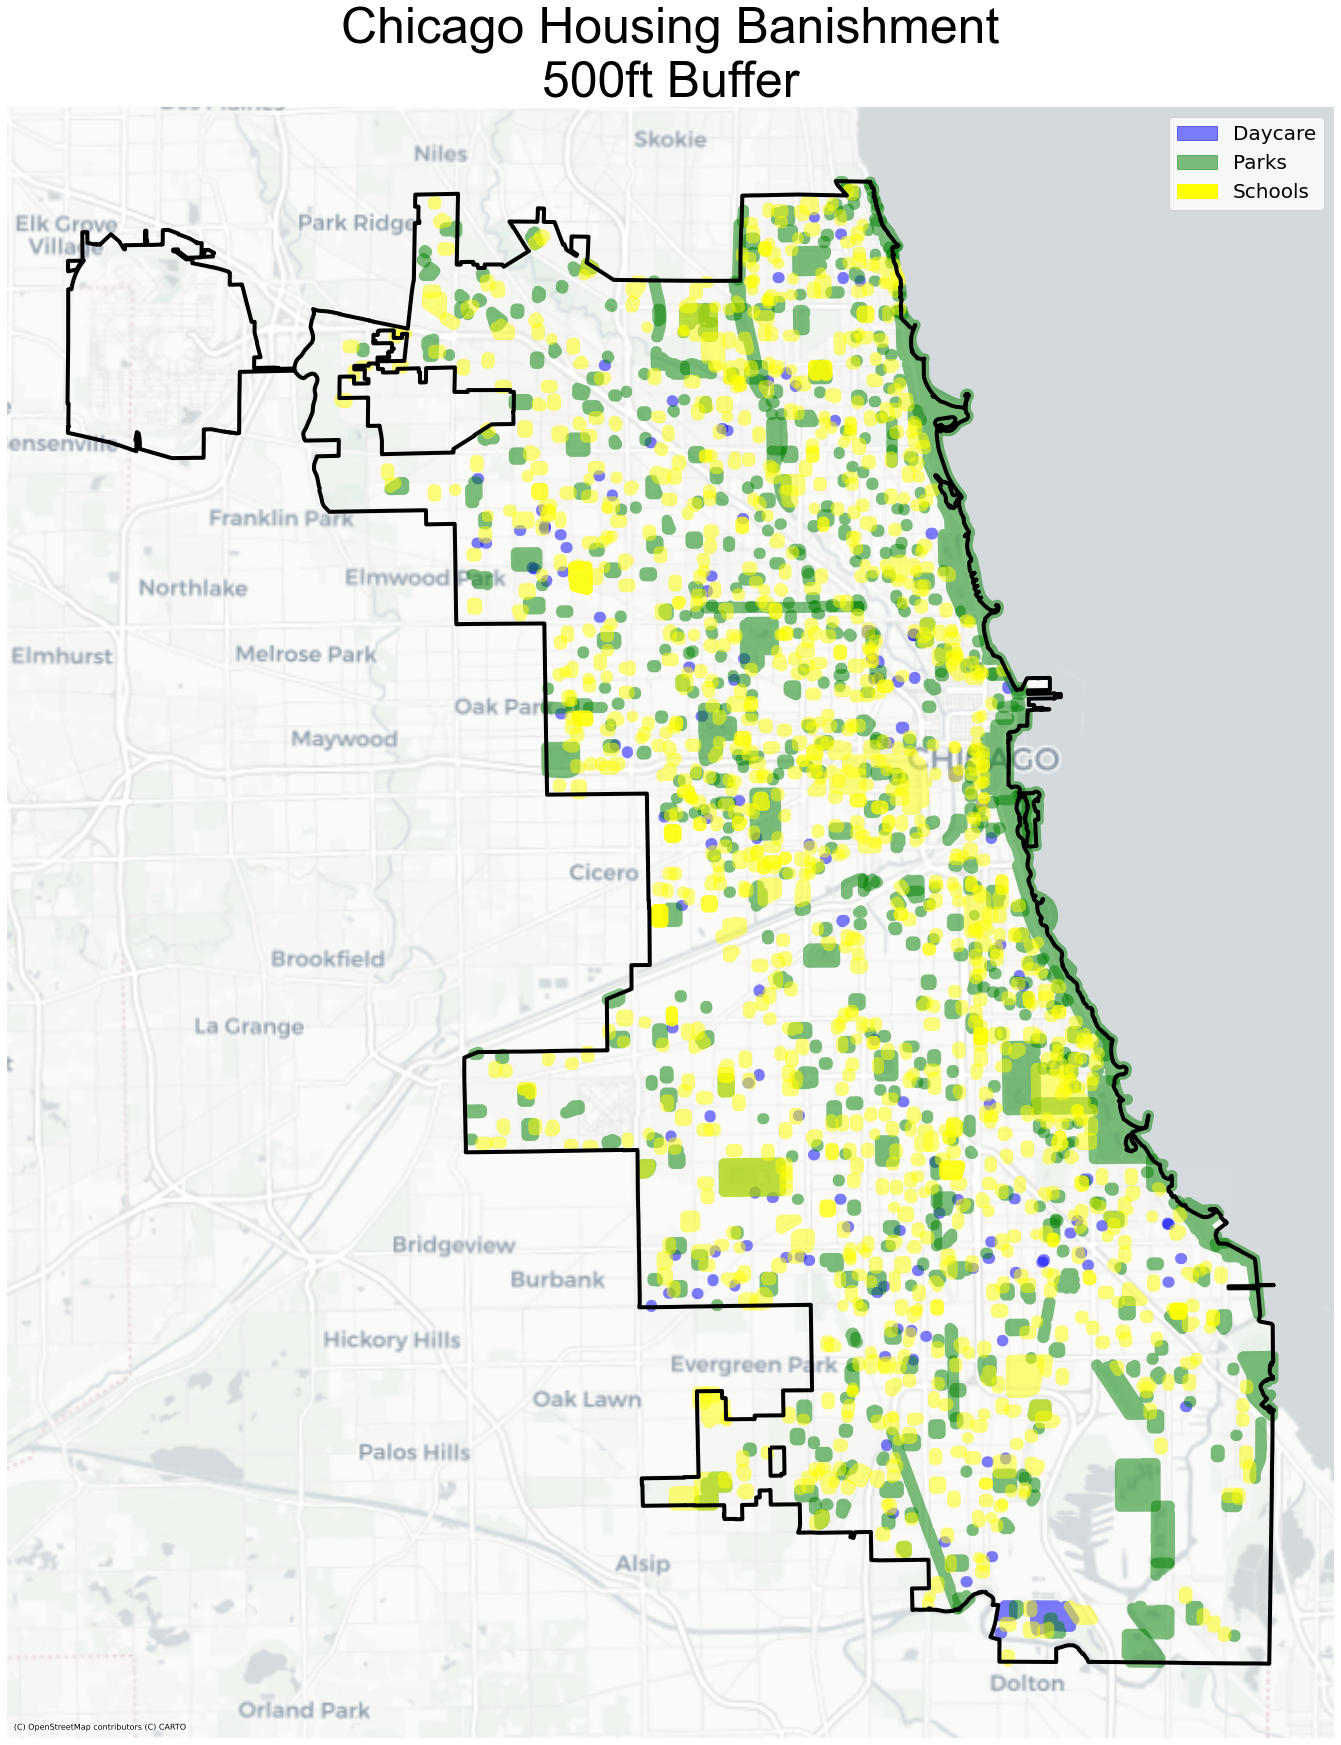

In [29]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment\n500ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})

plt.savefig('./images/chicago_housing_banishment_500ft_buffer.png', transparent=True)
plt.show()

### 250 ft buffer

In [30]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

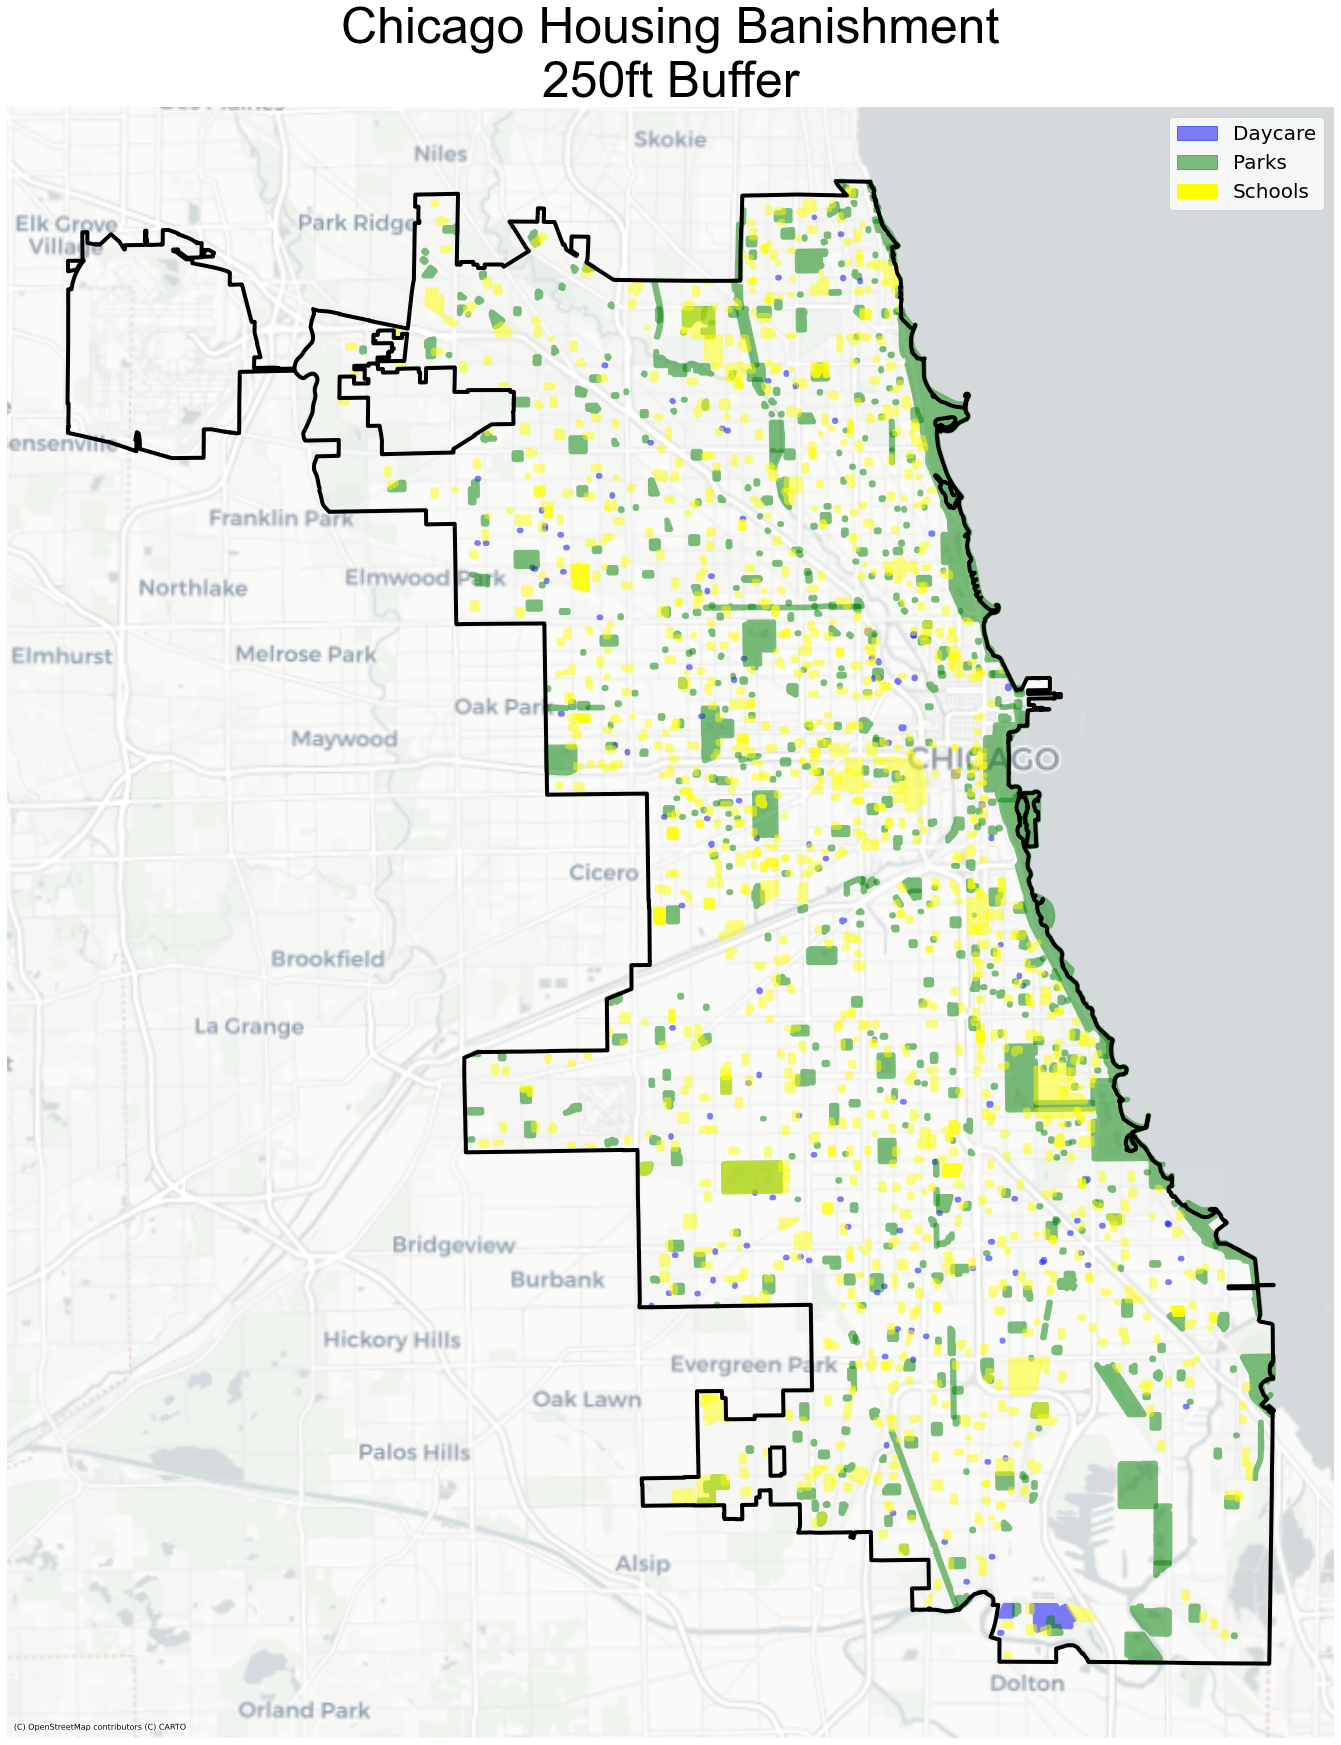

In [31]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':20}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment\n250ft Buffer', fontdict={'size':50,
                                                            'weight':'normal',
                                                            'family':'arial'})

plt.savefig('./images/chicago_housing_banishment_250ft_buffer.png', transparent=True)
plt.show()

## Public Presence Banishment